In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./datasets/WisconsinBreastCancerDataset.csv')

In [70]:
data.head(50)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [4]:
data.shape

(569, 33)

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [51]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

In [61]:
X =data[features].values

In [63]:
X

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          1.47100000e-01,   2.41900000e-01,   7.87100000e-02],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          7.01700000e-02,   1.81200000e-01,   5.66700000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          1.27900000e-01,   2.06900000e-01,   5.99900000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          5.30200000e-02,   1.59000000e-01,   5.64800000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          1.52000000e-01,   2.39700000e-01,   7.01600000e-02],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   1.58700000e-01,   5.88400000e-02]])

In [64]:
wcss = []

In [65]:
type(X)

numpy.ndarray

In [66]:
for i in range(1,15):
    find_centroids =  KMeans(n_clusters = i,random_state = 0)
    find_centroids.fit(X)
    wcss.append(find_centroids.inertia_)

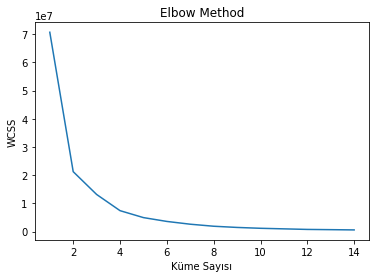

In [67]:
plt.plot(range(1,15), wcss)
plt.title('Elbow Method')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')
plt.show()

In [68]:
kmeans = KMeans(n_clusters = 4)
model= kmeans.fit_predict(X)
print("model\n",model)

model
 [1 1 1 2 1 2 1 0 2 2 0 0 1 0 0 0 0 0 1 0 2 2 0 1 1 1 0 1 0 1 1 2 0 1 0 0 0
 2 0 0 0 2 1 0 0 1 2 0 2 0 2 0 2 1 0 2 1 0 2 2 2 2 0 2 2 0 2 2 2 2 1 2 1 0
 2 0 0 1 1 2 2 2 3 1 2 1 0 1 2 0 0 0 0 0 0 1 2 2 2 0 0 2 2 2 2 0 2 2 1 2 2
 2 0 2 2 2 2 0 0 1 2 1 3 0 0 0 0 1 0 1 2 0 0 0 1 2 2 2 0 2 2 0 2 2 2 2 2 0
 0 0 2 2 2 2 0 2 1 0 2 2 2 1 1 2 3 0 2 0 1 0 2 0 0 2 2 2 2 0 2 2 3 1 0 2 0
 2 1 2 2 2 0 2 2 2 0 2 0 1 1 0 2 1 3 0 2 0 2 1 0 0 1 2 3 1 0 0 2 2 1 1 0 0
 2 0 0 0 2 0 2 2 0 2 2 1 2 0 3 1 0 1 0 2 2 0 1 2 0 2 2 2 1 2 1 1 1 0 1 0 0
 0 1 1 1 0 1 1 2 0 2 2 0 2 1 2 1 2 2 1 0 0 1 2 1 0 2 2 2 2 2 2 0 0 2 2 2 0
 2 2 0 2 1 2 1 2 2 2 0 2 0 0 2 0 2 2 2 2 2 1 2 2 2 1 2 1 2 2 0 2 0 0 0 2 2
 2 2 1 2 1 2 3 0 2 2 1 2 2 2 0 2 2 2 0 3 0 2 2 2 0 2 2 2 0 2 0 0 1 1 2 3 1
 0 0 1 1 0 0 2 0 0 2 2 2 2 2 0 0 2 0 2 1 2 2 0 1 2 0 0 2 2 2 1 2 2 2 2 2 0
 2 1 2 2 2 2 0 0 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 0 2 1 1 0 0 2 0 0 0 2 1 0 2
 1 2 1 0 0 1 2 1 2 0 2 0 2 0 2 2 1 3 0 2 0 0 0 2 1 2 2 2 0 2 2 2 0 0 2 0 2
 0 0 0 0 2 0 1 2 0

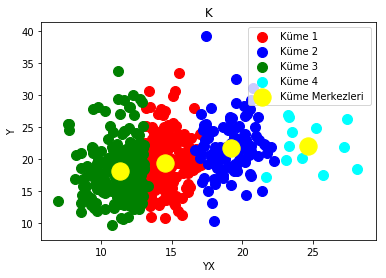

In [69]:
plt.scatter(X[model == 0, 0], X[model == 0, 1], s = 100, c = 'red', label = 'Küme 1')
plt.scatter(X[model == 1, 0], X[model == 1, 1], s = 100, c = 'blue', label = 'Küme 2')
plt.scatter(X[model == 2, 0], X[model == 2, 1], s = 100, c = 'green', label = 'Küme 3')
plt.scatter(X[model == 3, 0], X[model == 3, 1], s = 100, c = 'cyan', label = 'Küme 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Küme Merkezleri ')
plt.title(' WBC Clustering wrt Cell Mean Values')
plt.xlabel('YX')
plt.ylabel('Y')
plt.legend()
plt.show()